# Volumetric Equations of State 

## Generalized Form of the Volumetric Equation of State

Cubic forms of volumetric equations of state played a central role in thermodynamics at the turn of the 19th century and continue to be used today to compute changes in *thermal variables* in terms of changes in *volumetric variables*. As was discussed in the first half of your course, we use the first and second laws of thermodynamics to compute how changes of state of liquid and vapors can be used to describe the flows of energy and mass in various unit operations. A necessary part of the problem solving that takes place is the ability to obtain high quality volumetric and thermal data for single component and multicomponent substances and mixtures of interest.

The starting point for computer *thermal variables* from *volumetric variables* is the volumetric equation of state, which relates $P$, $T$, and $\underline{V}$. The ideal gas law is one form of a cubic equation of state and for the purposes of this lecture, we will write the ideal gas law as:

$$\dfrac{P\underline{V}}{RT}=1$$

For simplicity, we define a property called the compressibility $Z=\dfrac{P\underline{V}}{RT}$ for more generalized forms of equations of state so that they may be written compactly. Using the compressibility, it is possible to define different orders of *equations of state* by writing the equation of state in terms of a polynomial expression of the form:

$$ 0=\sum_{i,0}^{n} a_i Z^i $$

where the integer $n$ is the highest order of the polynomial expression.





### First Order Equations of State

The ideal gas law is an example of a *first-order* equation of state because the highest power of the compressibility in the ideal gas law is $n=1$. All first order equations of state can be written as:

$$ \beta Z+\gamma=0 $$

where $\beta$ and $\gamma$ are parameters of the 1st order polynomial expression. For the ideal gas law, $\beta=1$ and $\gamma=-1$

An interactive example of a plot of the ideal gas law is given below. In this example, by changing the Temperature, you will notice that the line shape does not change, but the curve shifts vertically up and down with increases and decreases in Temperature. The ideal gas is a 1-phase fluid at all Temperatures and its behavior is defined over all conceivable phase space, but only accurate in the fully expanded limit, $lim_{P\rightarrow 0}$ or $lim_{\underline{V}\rightarrow \infty}$.

In [6]:
%matplotlib notebook

from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np


##lets define some properties
R=8.314##J/mol*K

##typical molar valume ranges fall in this value of density
V=np.logspace(1,5,201)##cm3/mol
T=298 ## Kelvin

def P_IG(T,V):    
    return R*T/V ## units returned in bar

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)##create a subplot for plotting

line,=plt.plot(V,P_IG(T,V),'-r',label=r'$IG_{T=%3.1f K}$'%T)##plot the isotherm

plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')


##replots based on value of sliders.
def update(T=273):
    line.set_data(V,P_IG(T,V))
    line.set_label(r'$IG_{T=%3.1f K}$'%T)
    plt.xlim(min(V),max(V))
    plt.ylim(min(P_IG(T,V)),max(P_IG(T,V)))
    plt.legend()
    
    fig.canvas.draw_idle()
    
interact(update,T=(1,1000.0,1.0));

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=273.0, description='T', max=1000.0, min=1.0, step=1.0), Output()), _do…

### Second Order Equations of State

The Virial Equation of State is an example of a *second-order* equation of state because the highest power of the compressibility is $n=2$ in the general form. All second-order equations of state can be written as:

$$ \alpha Z^2 + \beta Z+\gamma=0 $$

where $\beta$ and $\gamma$ are parameters of the 1st order polynomial expression. Traditionally, the virial equation of state is given as $\alpha=1$ $\beta=-\dfrac{aP}{(RT)^2}$ and $\gamma=0$

The virial equation of state is often not written in this explicit polynomial form, but instead in a form the reflects the expected deviation from the ideal gas law. 

$$\dfrac{P\underline{V}}{RT}=1-\dfrac{a(T)}{RT\underline{V}}$$

or 

$$Z=1-\dfrac{B(T)}{\underline{V}}$$

<IPython.core.display.Javascript object>


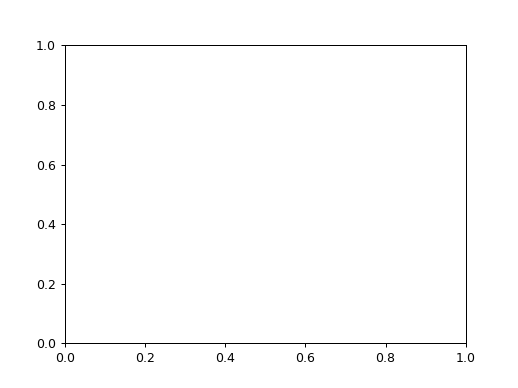

NameError: name 'P_IG' is not defined

In [1]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np

##lets define some properties
R=8.314##J/mol*K

##typical molar valume ranges fall in this value of density
V=np.logspace(1,5,201)##cm3/mol
T=298 ## Kelvin
a=0.2##Pa*m^6/mol

def P_VEOS(T,V,a):
    
    return R*T/V-a*10**6/V**2 ## units returned in bar

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1,=plt.plot(V,P_IG(T,V),'-r',label=r'$IG_{T=%3.1f K}$'%T)
line2,=plt.plot(V,P_VEOS(T,V,a),'-b',label=r'$VEOS_{T=%3.1f K}$'%T)

plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')
plt.legend()

def update(T=273,a=0.2):
    line1.set_data(V,P_IG(T,V))
    line1.set_label(r'$IG_{T=%3.1f K}$'%T)
    line2.set_data(V,P_VEOS(T,V,a))
    line2.set_label(r'$IG_{T=%3.1f K}$'%T)
    plt.xlim(min(V),max(V))
    plt.ylim(min(P_IG(T,V)),max(P_IG(T,V)))
    plt.legend()
    fig.canvas.draw_idle()
    
interact(update,T=(1,1000.0,1.0),a=(0.001,1.0,0.001));

## Cubic (Third Order) Equations of State

Cubic Equations of State are *third-order* equations of state because the highest power of the compressibility is $n=3$ in the general form. All cubic equations of state can be written as:

$$Z^3 + \alpha Z^2 + \beta Z+\gamma=0 $$

where $\alpha$, $\beta$, and $\gamma$ are parameters of the 3rd order polynomial expression. Cubic equations of state have a special place in the history of thermodynamics because Van der Waal's equation of state was the first to provide quantitative predictions of vapor-liquid equilibrium. Van der Waal showed that it is only when the cubic term is included can there be a circumstance where equilibrium between a vapor and a liquid can be calculated.

### Van der Waal Equation of State - 1873
Van der Waal's Equation of state has the form:

$$P=\dfrac{RT}{\underline{V}-b}-\dfrac{a}{\underline{V}^2}$$

The Van der Waal Equation of state has two parameters, $a$, and $b$. $a$ is called the attraction parameter and represents the favorable interactions between gas molecules that occur when they are at higher densities. $b$ is called the excluded volume parameter or sometimes the repulsive parameter and can be thought of as representing the effective volume of a gas molecule. An interesting feature of Van der Waal's equation of state is that it diverges in the $lim_{\underline{V}\rightarrow b} P\rightarrow\infty$


### Redlich-Kwong Equation of State - 1949
The Redlich-Kwong Equation of state has the form:

$$P=\dfrac{RT}{\underline{V}-b}-\dfrac{a}{\sqrt{T}\underline{V}(\underline{V}+b)}$$

The Redlich-Kwong Equation of State was a notable improvement over Van Der Waals, but still performed poorly at predicting liquid phase densities.

### Peng-Robinson Equation of State - 1976
The [Peng-Robinson Equation of State](https://pubs.acs.org/doi/abs/10.1021/i160057a011) has the form:

$$P=\dfrac{RT}{\underline{V}-b}-\dfrac{a\alpha}{\underline{V}(\underline{V}+b)+b(\underline{V}-b)}$$

where an additional parameter $\alpha=\big(1+\kappa(1-T_r^{0.5})\big)^2$ has been introduced where $\kappa=0.37464+1.54226\omega-0.26992\omega^2$ 

In this expression, $\omega$ is the accentric factor and $T_r$ is the reduced temperature. For the definition of the reduced temperature see the discussion on the law of corresponding states and critical properties.

The introduction of a third constant, $\omega$, provided a much more accurate expression both for single components but also for binary mixtures. 

<IPython.core.display.Javascript object>


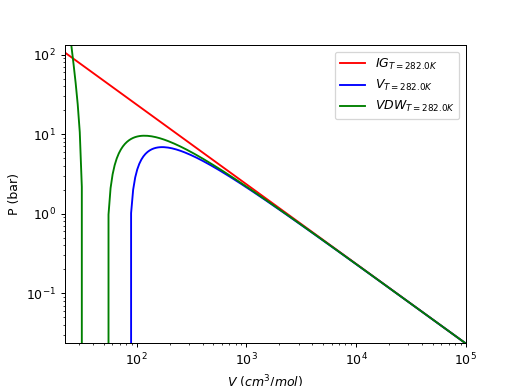

interactive(children=(FloatSlider(value=273.0, description='T', max=1000.0, min=1.0, step=1.0), FloatSlider(va…

In [3]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt

##lets define some properties
R=8.314##J/mol*K

##typical molar valume ranges fall in this value of density

T=298 ## Kelvin
a=0.2##Pa*m^6/mol
b=18

V=np.logspace(np.log10(b),5,201)##cm3/mol

def P_VEOS(T,V,a):
    
    return R*T/V-a*10**6/V**2 ## units returned in bar

def P_VDW(T,V,a,b):
    return R*T/(V-b)-a*10**6/V**2 ## units returned in bar


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line1,=plt.plot(V,P_IG(T,V),'-r',label=r'$IG_{T=%3.1f K}$'%T)
line2,=plt.plot(V,P_VEOS(T,V,a),'-b',label=r'$V_{T=%3.1f K}$'%T)
line3,=plt.plot(V,P_VDW(T,V,a,b),'-g',label=r'$VDW_{T=%3.1f K}$'%T)

plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')
plt.legend()

def update(T=273,a=0.2,b=20):
    line1.set_data(V,P_IG(T,V))
    line1.set_label(r'$IG_{T=%3.1f K}$'%T)
    line2.set_data(V,P_VEOS(T,V,a))
    line2.set_label(r'$V_{T=%3.1f K}$'%T)
    line3.set_data(V,P_VDW(T,V,a,b))
    line3.set_label(r'$VDW_{T=%3.1f K}$'%T)
    
    plt.xlim(1.1*b,max(V))
    plt.ylim(min(P_IG(T,V)),max(P_IG(T,V)))
    plt.legend()
    fig.canvas.draw_idle()
    
interact(update,T=(1,1000.0,1.0),a=(0.001,1.0,0.001),b=(1,100,1));

## Exercises

1. Using the NIST property database, determine $a$ and $b$ for steam at 500 K using both the Redlich-Kwong and Van der Waal's Equation of State.

- How do the values compare?

- Were there any major challenges that you encountered in determining the values for either equation


2. Generate a plot of the Peng-Robinson Equation of State for methane. Please provide at least 5 isotherms spanning a range of reduced temperatures including 0.5, 0.75, 0.9, 1.0, 2.0.

- Describe the general featuers of the isotherms above and below the critical temperature.
- As the molecular weight of the hydrocarbon increases, it has an interesting effect on the the parameters $a$ and $b$. Based on these changes, wht do you observe about changes in $a$ and $b$. 

